In [2]:
import cv2
import numpy as np

img = cv2.imread('/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/A1.png')
img2 = img.copy()


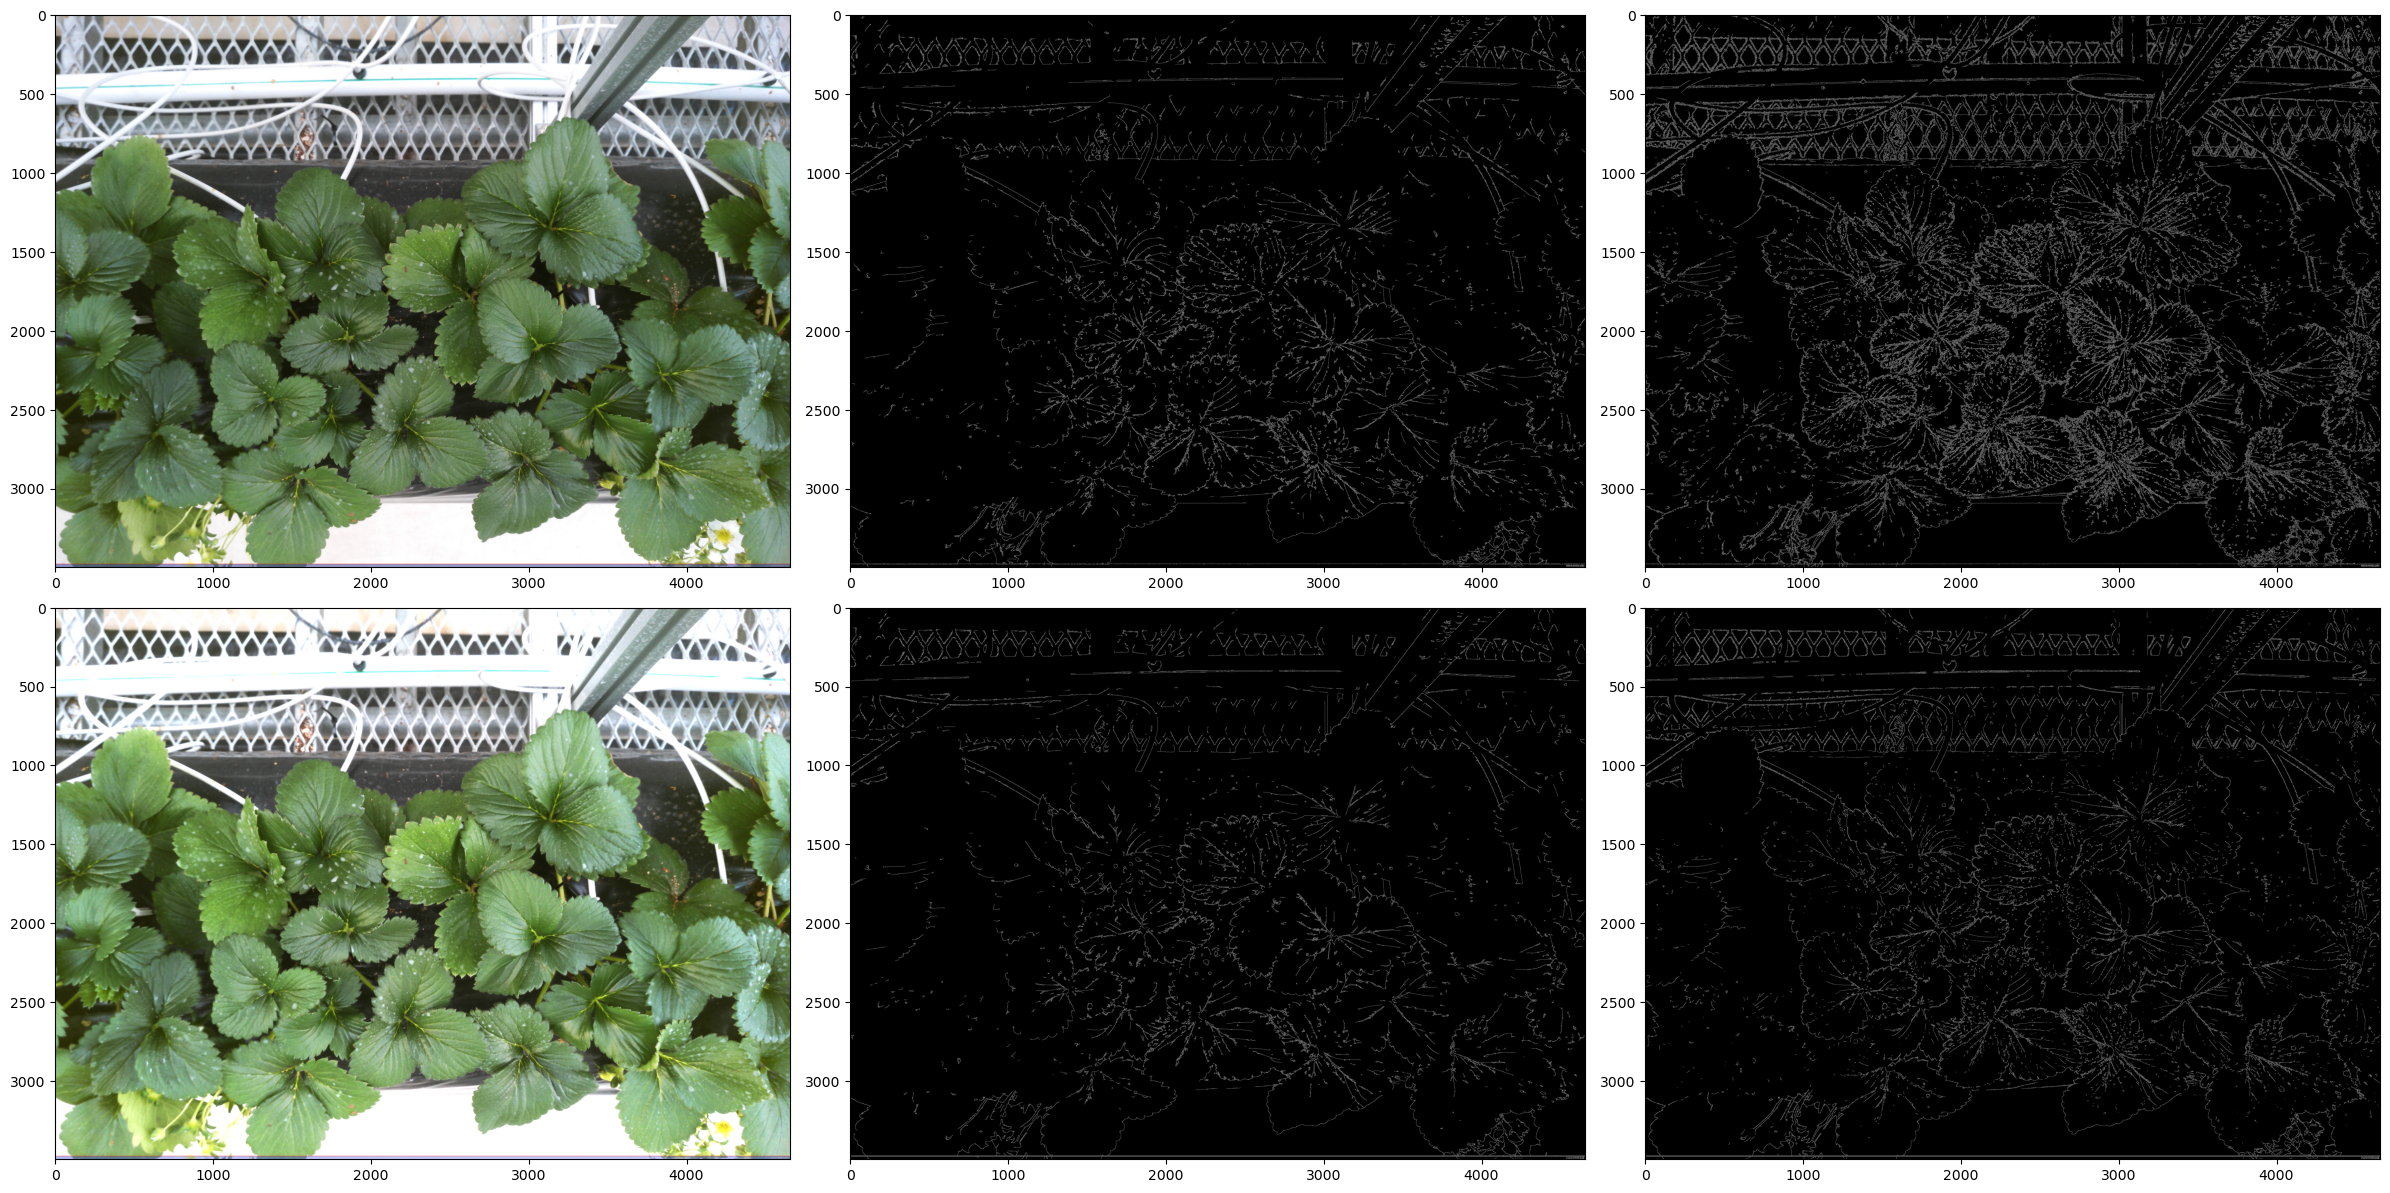

In [3]:
import matplotlib.pyplot as plt

canny1 = cv2.Canny(img2, 50,255)
canny2 = cv2.Canny(img2, 40,100)

kernel = np.array([[0.1,1,0.1],
                  [0.2,-1,0.2],
                  [0.1,0.5,0.1]])

filterd = cv2.filter2D(img2, -1, kernel)
canny3 = cv2.Canny(filterd, 50,255)
canny4 = cv2.Canny(filterd, 150,100)

#cv는 BGR 순서, plt는 RGB순서
pltim1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
filterim = cv2.cvtColor(filterd, cv2.COLOR_BGR2RGB)


plt.figure(figsize = (24,12))
plt.subplot(2,3,1)
plt.imshow(pltim1, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(canny1, cmap='gray')
plt.subplot(2,3,3)
plt.imshow(canny2, cmap='gray')

plt.subplot(2,3,4)
plt.imshow(filterim, cmap='gray')

plt.subplot(2,3,5)
plt.imshow(canny3, cmap='gray')
plt.subplot(2,3,6)
plt.imshow(canny4, cmap='gray')


plt.tight_layout()
plt.show()

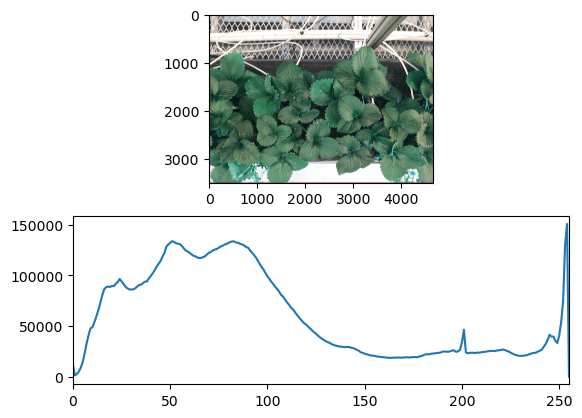

In [4]:
import cv2
from matplotlib import pyplot as plt

img3=img2.copy()
hist = cv2.calcHist([img3], [0], None, [256], [0,255])
plt.subplot(2,1,1),plt.imshow(img3,'gray')
plt.subplot(2,1,2),plt.plot(hist)
plt.xlim([0,255])
plt.show()

In [5]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic


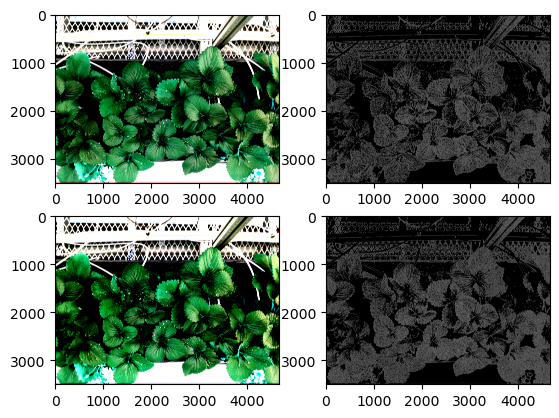

In [6]:

img4 = saturate_contrast2(img3,1.3)
img5 = saturate_contrast2(img3, 2)

canny6 = cv2.Canny(img4, 50,100)
canny7 = cv2.Canny(img5, 50,100)

plt.subplot(2,2,1),plt.imshow(img4,'gray')
plt.subplot(2,2,2),plt.imshow(canny6,'gray')

plt.subplot(2,2,3),plt.imshow(img5,'gray')
plt.subplot(2,2,4),plt.imshow(canny7,'gray')
plt.show()

In [7]:
img2side = cv2.imread('/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/A2.png')
img2_side = img2side.copy()

img22side = cv2.imread('/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/A2_2.png')
img22_side = img22side.copy()
img23side = cv2.imread('/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/A2_3.png')
img23_side = img23side.copy()

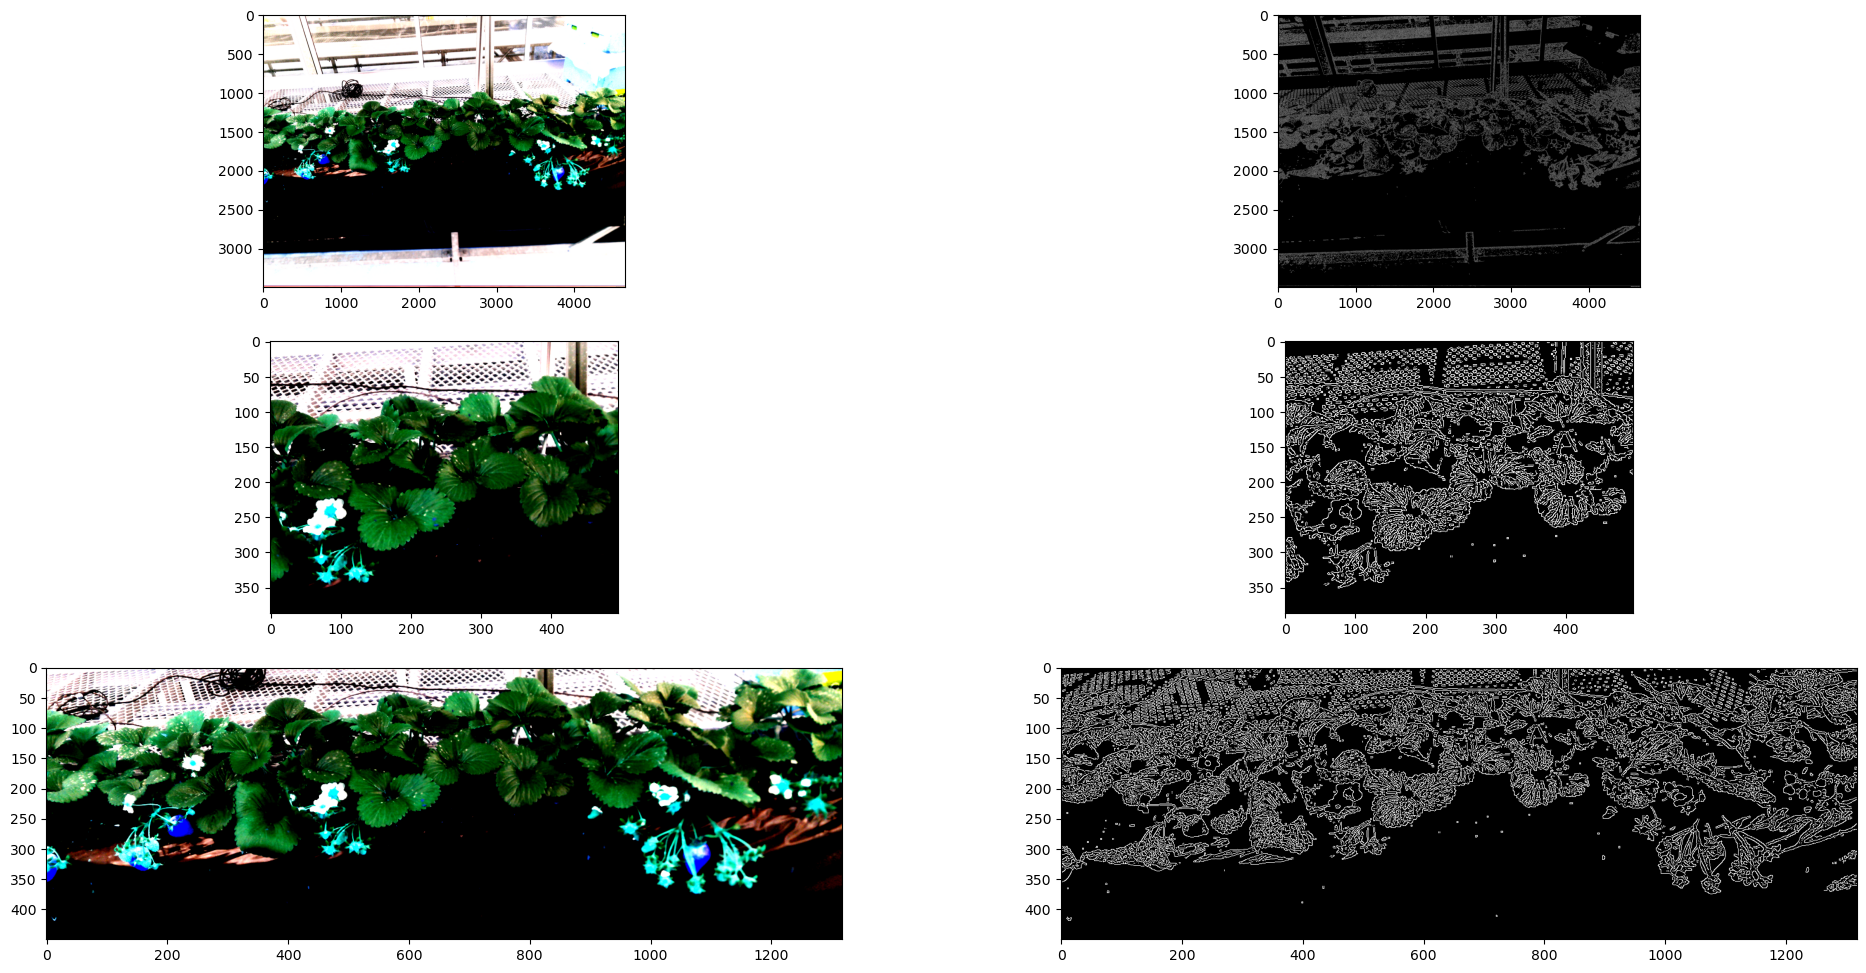

In [8]:
img_s2 = saturate_contrast2(img2_side,2)
s2canny = canny6 = cv2.Canny(img_s2, 50,100)
img_s22 = saturate_contrast2(img22_side, 2)
s22canny = canny6 = cv2.Canny(img_s22, 50,100)
img_s23 = saturate_contrast2(img23_side, 2)
s23canny = canny6 = cv2.Canny(img_s23, 50,100)

"""#cv는 BGR 순서, plt는 RGB순서
img_s2 = cv2.cvtColor(img_s2, cv2.COLOR_BGR2RGB)
img_s22 = cv2.cvtColor(img_s22, cv2.COLOR_BGR2RGB)
img_s23 = cv2.cvtColor(img_s23, cv2.COLOR_BGR2RGB)
filterim = cv2.cvtColor(filterd, cv2.COLOR_BGR2RGB)
"""

plt.figure(figsize = (24,12))
plt.subplot(3,2,1),plt.imshow(img_s2,'gray')
plt.subplot(3,2,2),plt.imshow(s2canny,'gray')

plt.subplot(3,2,3),plt.imshow(img_s22,'gray')
plt.subplot(3,2,4),plt.imshow(s22canny,'gray')

plt.subplot(3,2,5),plt.imshow(img_s23,'gray')
plt.subplot(3,2,6),plt.imshow(s23canny,'gray')
plt.show()


In [9]:
cv2.imwrite("/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/filtered/A2.png", img_s2)
cv2.imwrite("/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/filtered/A2_2.png", img_s22)
cv2.imwrite("/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/filtered/A2_3.png", img_s23)

True

In [10]:
cv2.imwrite("/home/hyeonji/SuperGluePretrainedNetwork/assets/iitp_str_rename/filtered/A1.png", img5)

True

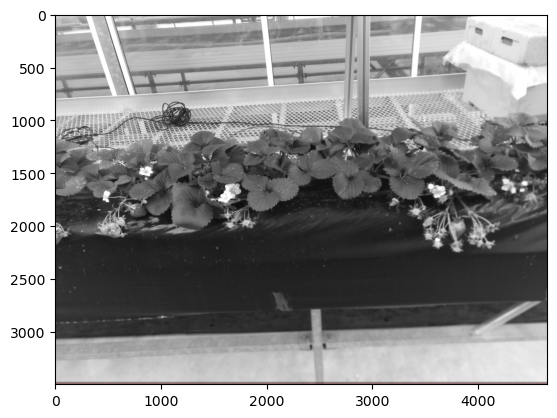

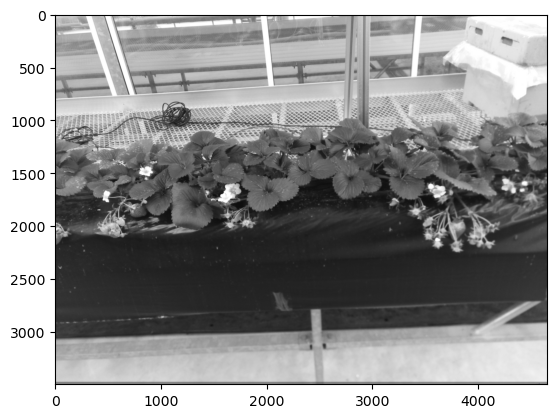

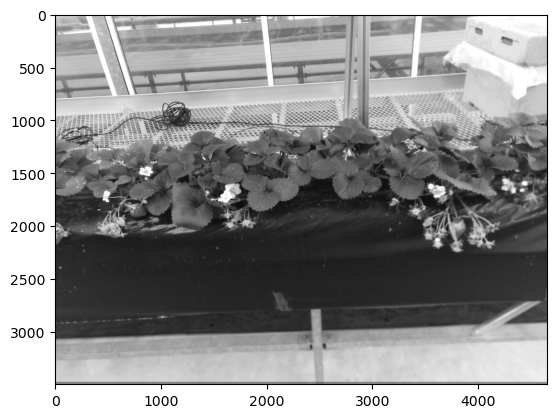

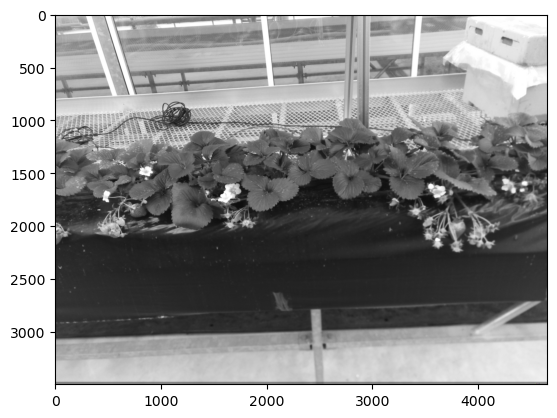

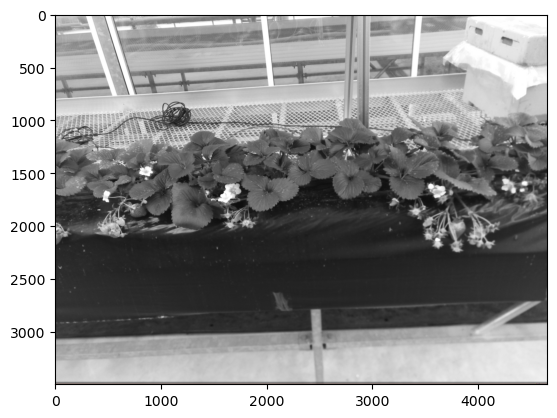

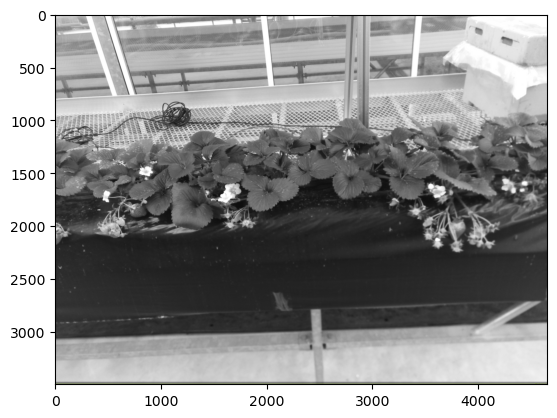

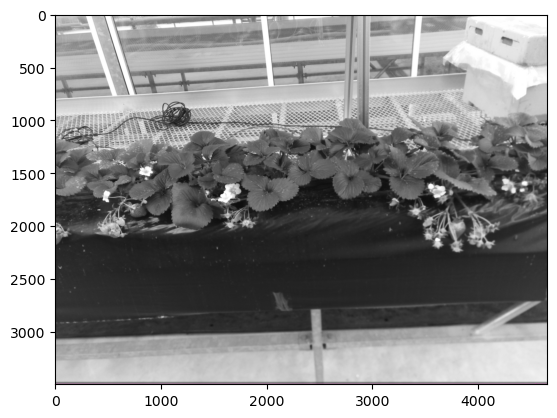

'src2 = src.astype(np.uint8)\nsrc2=cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)\n\ncontours, hier = cv2.findContours(src2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\nfor contour in contours:\n    cv2.drawContours(img2, [contour], -1, (0,0,255), 2)\n    \nplt.imshow(img2)\nplt.show()'

In [17]:
import cv2, random, sys

src = img2_side

if src is None:
    print('Image load failed!')
    sys.exit()

mode = [cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE]
name = ['RETR_EXTERNAL', 'RETR_LIST', 'RETR_CCOMP', 'RETR_TREE']

src2 = src.astype(np.uint8)
src2=cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)

for m in mode:
    
    contours, hier = cv2.findContours(src2, m, cv2.CHAIN_APPROX_NONE)

    dst = cv2.cvtColor(src2, cv2.COLOR_GRAY2BGR)

    idx = 0
    while idx >= 0:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # 랜덤 BGR값 생성
        cv2.drawContours(dst, contours, idx, c, 2, cv2.LINE_8, hier)
        idx = hier[0, idx, 0]  # 다음 외곽선이 없으면 -1 반환
      
        plt.imshow(dst)
        
        plt.show()
"""src2 = src.astype(np.uint8)
src2=cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)

contours, hier = cv2.findContours(src2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.drawContours(img2, [contour], -1, (0,0,255), 2)
    
plt.imshow(img2)
plt.show()"""

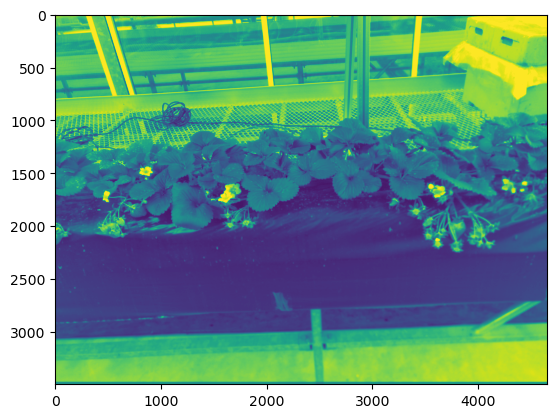

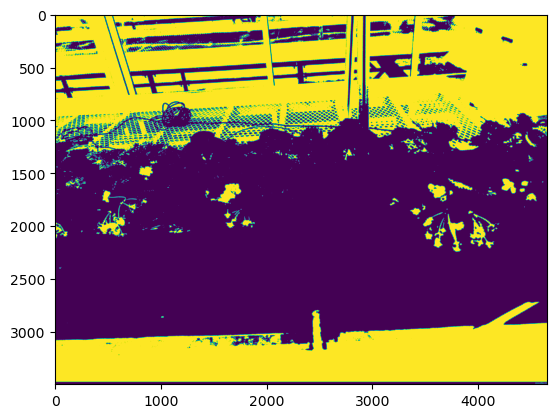

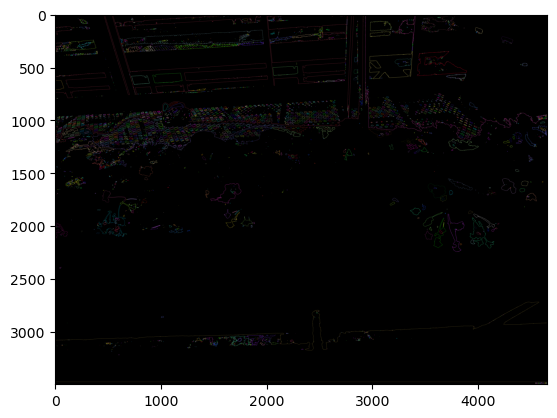

In [21]:

_, src_bin = cv2.threshold(src2, 150, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

h, w = src.shape[:2]
dst = np.zeros((h, w, 3), np.uint8)

for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, i, c, 1, cv2.LINE_AA)

    
plt.imshow(src2)
plt.show()
plt.imshow(src_bin)
plt.show()
plt.imshow(dst)
plt.show()
